In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import math


# Importing libraries
  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

In [155]:
D_X, D_y = np.loadtxt("train.dat", usecols=(0,1), unpack=True)
T_X, T_y = np.loadtxt("test.dat", usecols=(0,1), unpack=True)
X = D_X.reshape(-1,1)
XT = T_X.reshape(-1,1)
y = D_y
X_scaled = (X - np.mean(X))/np.std(X)
poly = PolynomialFeatures(degree=4)
X_trans = poly.fit_transform(X_scaled)

TX_scaled = (XT - np.mean(XT))/np.std(XT)
TX_scaled_po = poly.fit_transform(TX_scaled)

In [156]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 1 )

In [157]:
model.fit( X_trans, y )

In [158]:
Y_pred = model.predict( TX_scaled_po ) 

In [159]:
D_X

array([1998., 2008., 1975., 2004., 1980., 2002., 2007., 1979., 1992.,
       1982., 2017., 1991., 1981., 1977., 1976., 1973., 2001., 1999.,
       1974., 2003., 2005., 1993., 1988., 1994., 1997., 2018., 1989.,
       1987., 2012., 2019., 2000., 1971., 2006., 1970., 2021., 2014.,
       1986., 1984., 1978., 1996., 2015., 2020.])

C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

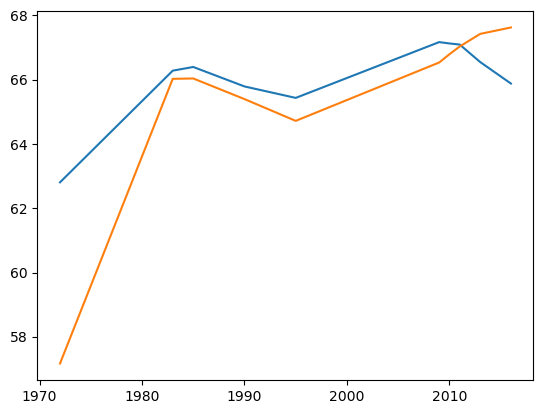

In [160]:
import seaborn as plt
plt.lineplot(T_X,T_y)
plt.lineplot(T_X,Y_pred)

In [161]:
y

array([65.88791334, 67.21901249, 64.3206674 , 66.92166376, 66.11401206,
       66.59359495, 67.29843266, 65.96910343, 65.4752471 , 66.2797506 ,
       65.62325127, 65.58762306, 66.23720265, 65.26999151, 64.84324978,
       63.34073035, 66.40316557, 66.04316515, 63.87068233, 66.73921392,
       67.11898948, 65.37437138, 66.22703075, 65.36499928, 65.71061236,
       65.35474362, 66.00611589, 66.368468  , 66.78334217, 65.08089532,
       66.20761473, 62.29623387, 67.26293826, 61.93885757, 64.92412865,
       66.31769921, 66.45910062, 66.34765   , 65.65052   , 65.53492   ,
       66.11388   , 65.08628   ])